IMPORT LIBRARY

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
import nltk

In [3]:
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from IPython.display import display, Markdown

In [5]:
pwd

'C:\\Users\\ASUS'

IMPORT DATASET

In [7]:
dataset1 = pd.read_csv("D:\\Kuliah\\Skripsi 2\\Dataset\\csv\\GadgetIn_NewestComments.csv")
dataset2 = pd.read_csv("D:\\Kuliah\\Skripsi 2\\Dataset\\csv\\GadgetIn_TopComments.csv")
dataset3 = pd.read_csv("D:\\Kuliah\\Skripsi 2\\Dataset\\csv\\NanangMrk_NewestComments.csv")
dataset4 = pd.read_csv("D:\\Kuliah\\Skripsi 2\\Dataset\\csv\\NanangMrk_TopComments.csv")

In [8]:
dataset1.head()

,author,authorIsChannelOwner,cid,comment,commentsCount,hasCreatorHeart,pageUrl,publishedTimeText,replyCount,replyToCid,title,type,videoId,voteCount
0,@andyyulius1309,False,UgzdTnloEtC0KoxUltV4AaABAg,"Kata nya harga starlink hanya 1,999000 jt sj t...",12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,16 hours ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0
1,@basufafaofficial6940,False,Ugxk0lEb3KtCKpoDWAx4AaABAg,Ada bahayanya juga sih..Elon mars mau ledakkan...,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,2 days ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0
2,@asrolbaisuki764,False,UgyHaRrOWfbXZ58TkCh4AaABAg,Bisa dipakai sampe brpa device bang,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,2 days ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0
3,@salareaofficial3185,False,Ugz8iuygbE6rBAFAWbN4AaABAg,ngeri,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,2 days ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0
4,@ajikasep22,False,UgxdO5TmcRXTNu0AMnp4AaABAg,Bang kenapa manusia saling menyakiti?,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,3 days ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0


In [9]:
dataset2.head()

,author,authorIsChannelOwner,cid,comment,commentsCount,hasCreatorHeart,pageUrl,publishedTimeText,replyCount,replyToCid,title,type,videoId,voteCount
0,@asrirafifahmad7903,False,Ugwtf7ujp4AiER8rOIx4AaABAg,Starbucks keliling,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,4 months ago,183,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,7300
1,@adiadisecond8971,False,UgzY1QeFeXpzw0K8tWd4AaABAg,Starlink ini adalah investasi yang sangat bagu...,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,4 months ago,55,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,1200
2,@fajarcahyono3693,False,Ugw_HXk0ty_BPIgAE9N4AaABAg,Malu gak sih yang katanya Elite Global dengan ...,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,4 months ago,100,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,929
3,@Aoururu,False,UgwvyCHd-xKFs_3-hJ14AaABAg,Muncak bawa starlink buka jasa wifi di sana,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,4 months ago,66,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,259
4,@ajikasep22,False,UgxdO5TmcRXTNu0AMnp4AaABAg,Bang kenapa manusia saling menyakiti?,12306,False,https://www.youtube.com/watch?v=BHkTABfl9fc,2 days ago,0,NaN,REVIEW STARLINK INDONESIA - INI REVOLUSIONER 🔥,comment,BHkTABfl9fc,0


In [10]:
dataset3.head()

,author,authorIsChannelOwner,cid,comment,commentsCount,hasCreatorHeart,pageUrl,publishedTimeText,replyCount,replyToCid,title,type,videoId,voteCount
0,@NanangMrk,True,Ugwz3FqDFIgevEnVUaN4AaABAg,#INDONESIA DARURAT MEMBACA!!!!! \n\nSTARLINK I...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago (edited),419,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,1200
1,@irunchannel4470,False,UgzBVrEwAdbhkIEUbNV4AaABAg,Berpa hrga Starlink yg bisa di pake buat bisni...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,9 hours ago,0,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,0
2,@NengsihKilla,False,UgyxoIms8o0z-pTf8Ap4AaABAg,Kira kira berapa unit HP yang bisa konek ke di...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,4 days ago,0,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,0
3,@AbuDardaTrans,False,UgyROC0ERlOYUFAGsyB4AaABAg,Jarak maksimal berapa jauh mas signalnya,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,4 days ago,0,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,0
4,@YahyaArsyady,False,UgwCo-M_CmWHcZm0xxR4AaABAg,Hrga brpa 1 unitnya starlink yg lg d demo tu ?,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,9 days ago,0,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,0


In [11]:
dataset4.head()

,author,authorIsChannelOwner,cid,comment,commentsCount,hasCreatorHeart,pageUrl,publishedTimeText,replyCount,replyToCid,title,type,videoId,voteCount
0,@NanangMrk,True,Ugwz3FqDFIgevEnVUaN4AaABAg,#INDONESIA DARURAT MEMBACA!!!!! \n\nSTARLINK I...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago (edited),352,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,1200
1,@BILHANET,False,UgzDJ6_poQr8ysNrw-x4AaABAg,"Kalau ada yg nanyain Starlink di channelku, ta...",4843,True,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago,80,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,737
2,@Meow_Meow343,False,UgwtbUnU44QC16O2Kzt4AaABAg,Yg bilang mahal. Padahal biaya pembuatan athen...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago (edited),31,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,98
3,@enggaradinugroho6200,False,UgyTvjXXiKRiEqE4aHx4AaABAg,"Baru pasang kemaren, emang se worth it itu. ha...",4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago,29,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,123
4,@whiteson6986,False,Ugxstp_A1eReK_Mj3lh4AaABAg,Sebenernya kecepatannya Biasa aja kalo di nega...,4843,False,https://www.youtube.com/watch?v=U-ZyepruMh0,5 months ago,46,NaN,"STARLINK INDONESIA REVIEW, INTERNET DARI LANGI...",comment,U-ZyepruMh0,446


In [12]:
dataset1 = dataset1[['comment']]
display(Markdown("**GadgetIn - Newest Comments**"))
dataset1

**GadgetIn - Newest Comments**

,comment
0,"Kata nya harga starlink hanya 1,999000 jt sj t..."
1,Ada bahayanya juga sih..Elon mars mau ledakkan...
2,Bisa dipakai sampe brpa device bang
3,ngeri
4,Bang kenapa manusia saling menyakiti?
...,...
2495,Lagi nabung beli alatnya
2496,"Fibers CBN keren, saya pakai itu, tembus 50 Mb..."
2497,"Fibers CBN keren, saya pakai itu, tembus 50 Mb..."
2498,Kumpulin 5 rumah samping rumah untuk patungan....


In [13]:
dataset2 = dataset2[['comment']]
display(Markdown("**GadgetIn - Top Comments**"))
dataset2

**GadgetIn - Top Comments**

,comment
0,Starbucks keliling
1,Starlink ini adalah investasi yang sangat bagu...
2,Malu gak sih yang katanya Elite Global dengan ...
3,Muncak bawa starlink buka jasa wifi di sana
4,Bang kenapa manusia saling menyakiti?
...,...
2495,Bang kalo hujan terus ada petir itu aman gak ?...
2496,Cocok banget untuk orang yang punya pulau prib...
2497,untuk di ruko apakah jika di taruh rooftop bs ...
2498,"kalo lagi hujan lebat, rawan kena petir gak ba..."


In [14]:
dataset3 = dataset3[['comment']]
display(Markdown("**NanangMrk - Newest Comments**"))
dataset3

**NanangMrk - Newest Comments**

,comment
0,#INDONESIA DARURAT MEMBACA!!!!! \n\nSTARLINK I...
1,Berpa hrga Starlink yg bisa di pake buat bisni...
2,Kira kira berapa unit HP yang bisa konek ke di...
3,Jarak maksimal berapa jauh mas signalnya
4,Hrga brpa 1 unitnya starlink yg lg d demo tu ?
...,...
2494,"Itu lah akal nya orang kapir, dalam teknologi ..."
2495,Bandingin sama sinyal 5G bg
2496,Bang ini up to berapa device yang terhubung?
2497,perbulannya berpah itu......bisa buat rt rw ne...


In [15]:
dataset4 = dataset4[['comment']]
display(Markdown("**NanangMrk - Top Comments**"))
dataset4

**NanangMrk - Top Comments**

,comment
0,#INDONESIA DARURAT MEMBACA!!!!! \n\nSTARLINK I...
1,"Kalau ada yg nanyain Starlink di channelku, ta..."
2,Yg bilang mahal. Padahal biaya pembuatan athen...
3,"Baru pasang kemaren, emang se worth it itu. ha..."
4,Sebenernya kecepatannya Biasa aja kalo di nega...
...,...
1868,Minta no wa nya bang
1869,Mahal
1870,SATELIT APANYA ?😂 WONG ROKET AJA GA BISA NEMBU...
1871,Paket internet di kota brapa harganya kecepata...


COMBINING DATASET

In [17]:
combined_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)

In [18]:
combined_dataset.to_csv('Combined_Dataset_raw.csv', index=False)

In [19]:
combined_dataset = combined_dataset[['comment']]
display(Markdown("**Combined Dataset**"))
combined_dataset

**Combined Dataset**

,comment
0,"Kata nya harga starlink hanya 1,999000 jt sj t..."
1,Ada bahayanya juga sih..Elon mars mau ledakkan...
2,Bisa dipakai sampe brpa device bang
3,ngeri
4,Bang kenapa manusia saling menyakiti?
...,...
9367,Minta no wa nya bang
9368,Mahal
9369,SATELIT APANYA ?😂 WONG ROKET AJA GA BISA NEMBU...
9370,Paket internet di kota brapa harganya kecepata...


In [20]:
combined_dataset.shape

(9372, 1)

CLEANING DATASET

DUPLICATES

In [23]:
combined_dataset = combined_dataset.drop_duplicates(subset=['comment'])
combined_dataset.duplicated().sum()
combined_dataset = combined_dataset.dropna()
combined_dataset.shape

(7384, 1)

In [24]:
combined_dataset

,comment
0,"Kata nya harga starlink hanya 1,999000 jt sj t..."
1,Ada bahayanya juga sih..Elon mars mau ledakkan...
2,Bisa dipakai sampe brpa device bang
3,ngeri
4,Bang kenapa manusia saling menyakiti?
...,...
8334,@dodollucknutzz loh kan emang sudah dibahas....
8335,@dikky3349 Kan sudah dipindah dari atas mobi...
8336,@dodollucknutzz haha klo cuman dibawa ke ata...
8337,"@dodollucknutzz maksudnya, mau ngetes apakah..."


TYPING

In [26]:
def clean_comment_text(text):
  text = re.sub(r'@[A-zA-z0-9_]+', '', text) #penghapusan mention
  text = re.sub(r'#\w+', '', text) #penghapusan hastag
  text = re.sub(r'https?:\/\/\S+', '', text) #penghapusan url
  text = re.sub(r'\d+', '', text)  # Penghapusan angka

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #penghapusan karakter khusus/non alfa numerik
  text = re.sub(r'\s+', ' ', text).strip() #penghapusan double spasi

  return text

In [27]:
combined_dataset['comment'] = combined_dataset['comment'].str.lower()  # Mengubah kolom komentar menjadi lowercase

In [28]:
combined_dataset['comment'] = combined_dataset['comment'].apply(clean_comment_text)  # Terapkan fungsi untuk kolom komentar

In [29]:
display(Markdown("**Combined Dataset**"))
combined_dataset

**Combined Dataset**

,comment
0,kata nya harga starlink hanya jt sj terus byr ...
1,ada bahayanya juga sihelon mars mau ledakkan d...
2,bisa dipakai sampe brpa device bang
3,ngeri
4,bang kenapa manusia saling menyakiti
...,...
8334,loh kan emang sudah dibahas cuman kan abangnya...
8335,kan sudah dipindah dari atas mobil ke depan te...
8336,haha klo cuman dibawa ke atas mobil atau teras...
8337,maksudnya mau ngetes apakah jika pindah kabupa...


NORMALIZATION

In [31]:
norm = {
    ' sj ': ' saja ',
    ' ae ': ' saja ',
    ' aj ': ' saja ',
    ' rb ': ' ribu ',
    ' bae ': ' baik ',
    ' bkin ': ' bikin ',
    ' blg ': ' bilang ',
    ' rip ': ' mati ',
    ' dr ': ' dari ',
    ' auto ': ' langsung ',
    ' lgsg ': ' langsung ',
    ' sy ': ' saya ',
    ' sya ': ' saya ',
    ' bru ': ' baru ',
    ' dlu ': ' dulu ',
    ' kesel ': ' kesal ',
    ' gaje ': ' tidak jelas ',
    ' dmna ': ' di mana ',
    ' ga ': ' tidak ',
    ' cuan ': ' untung ',
    ' tggu ': ' tunggu ',
    ' hp ': ' handphone ',
    ' gan ': ' mas ',
    ' gpp ': ' tidak apa-apa ',
    ' hrga ': ' harga ',
    ' ngapain ': ' untuk apa ',
    ' ih ': ' ya ampun ',
    ' intinya ': ' pada dasarnya ',
    ' menyala ': ' keren ',
    ' jd ': ' jadi ',
    ' klian ': ' kalian ',
    ' brp ': ' berapa ',
    ' brpa ': ' berapa ',
    ' krna ': ' karena ',
    ' lgsg ': ' langsung ',
    ' mls ': ' malas ',
    ' mw ': ' mau ',
    ' kalo ': ' kalau ',
    ' mantab ': ' mantap ',
    ' nanya ': ' bertanya ',
    ' ngk ': ' tidak ',
    ' nggk ': ' tidak ',
    ' gk ': ' tidak ',
    ' ok ': ' oke ',
    ' alay ': ' berlebihan ',
    ' jgn ': ' jangan ',
    ' mhl ': ' mahal ',
    ' pngen ': ' pengen ',
    ' masi ': ' masih ',
    ' pls ': ' tolong ',
    ' sbg ': ' sebagai ',
    ' paan ': ' apa ',
    ' sdh ': ' sudah ',
    ' sm ': ' sama ',
    ' konoha ': ' Indonesia ',
    ' smgt ': ' semangat ',
    ' smkn ': ' semakin ',
    ' sngaja ': ' sengaja ',
    ' genah ': ' benar ',
    ' sp ': ' siapa ',
    ' spy ': ' supaya ',
    ' ssuai ': ' sesuai ',
    ' tdak ': ' tidak ',
    ' trmksih ': ' terima kasih ',
    ' tuh ': ' itu ',
    ' tmen ': ' teman ',
    ' gw ': ' aku ',
    ' ttep ': ' tetap ',
    ' emg ': ' memang ',
    ' tw ': ' tahu ',
    ' u ': ' kamu ',
    ' gg ': ' keren ',
    ' rb ': ' ribu ',
    ' kl ': ' kalau ',
    ' snyl ': ' sinyal ',
    ' klo ': ' kalau ',
    ' utk ': ' untuk ',
    ' yg ': ' yang ',
    ' dsb ': ' dan sebagainya ',
    ' jt ': ' juta ',
    ' yg ': ' yang ',
    ' jlk ': ' jelek ',
    ' bgt ': ' banget ',
    ' mantul ': ' mantap betul ',
    ' kren ': ' keren ',
    ' bacot ': ' omong kosong ',
    ' ngelag ': ' lambat ',
    ' tercover ': ' tercakup ',
    ' slow response ': ' lambat ',
    ' useless ' : ' tidak berguna ',
    ' cpet ': ' cepat ',
    ' cpt ': ' cepat ',
    ' support ': ' membantu ',
    ' overprice ': ' terlalu mahal ',
    ' unlimited ': ' tidak terbatas ',
    ' upgrade ': ' memperbarui ',  
    ' byr ': ' bayar ',
    ' org ': ' orang ',
    ' tdk ': ' tidak ',
    ' sllu ': ' selalu ',
    ' bgtu ': ' begitu ',
    ' bkn ': ' bukan ',
    ' ud ': ' sudah ',
    ' byk ': ' banyak ',
    ' bntr ': ' sebentar ',
    ' sni ': ' sini ',
    ' tp ': ' tapi ',
    ' bg ': ' bang ',
    ' bcor ': ' bocor ',
    ' gt ': ' begitu ',
    ' g ': ' tidak ',
    ' dgn ': ' dengan ',
    ' jg ': ' juga '
    
}

def normalisasi(str_text):
        for i in norm:
            str_text = str_text.replace(i, norm[i])
        return str_text

combined_dataset['comment'] = combined_dataset['comment'].apply(lambda x: normalisasi(x))

In [32]:
combined_dataset

,comment
0,kata nya harga starlink hanya juta saja terus ...
1,ada bahayanya juga sihelon mars mau ledakkan d...
2,bisa dipakai sampe berapa device bang
3,ngeri
4,bang kenapa manusia saling menyakiti
...,...
8334,loh kan emang sudah dibahas cuman kan abangnya...
8335,kan sudah dipindah dari atas mobil ke depan te...
8336,haha kalau cuman dibawa ke atas mobil atau ter...
8337,maksudnya mau ngetes apakah jika pindah kabupa...


In [33]:
def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

In [34]:
combined_dataset['comment'] = combined_dataset['comment'].apply(tokenize_text)

In [35]:
combined_dataset

,comment
0,"[kata, nya, harga, starlink, hanya, juta, saja..."
1,"[ada, bahayanya, juga, sihelon, mars, mau, led..."
2,"[bisa, dipakai, sampe, berapa, device, bang]"
3,[ngeri]
4,"[bang, kenapa, manusia, saling, menyakiti]"
...,...
8334,"[loh, kan, emang, sudah, dibahas, cuman, kan, ..."
8335,"[kan, sudah, dipindah, dari, atas, mobil, ke, ..."
8336,"[haha, kalau, cuman, dibawa, ke, atas, mobil, ..."
8337,"[maksudnya, mau, ngetes, apakah, jika, pindah,..."


In [36]:
# import Sastrawi
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# factory = StopWordRemoverFactory()
# stopwords = factory.get_stop_words()
# print(stopwords)

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
additional_stopwords = ["kalau", "aku", "nya", "apa", "daripada", "antara", "kalo", "dong", "sih", "bro", "lu", "kak", "wkwk", "om", "nih", "kok", "d", "si", "mungkin", "bg", "kan", "om", "bang", "kayak", "loh", "mas", "david", "nanang", "elon", "musk"]
stopwords = stopwords + additional_stopwords

print(stopwords)


['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [37]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [38]:
combined_dataset['comment'] = combined_dataset['comment'].apply(stopword_text)

In [39]:
combined_dataset

,comment
0,"[kata, harga, starlink, juta, terus, bayar, pe..."
1,"[bahayanya, sihelon, mars, mau, ledakkan, duni..."
2,"[dipakai, sampe, berapa, device]"
3,[ngeri]
4,"[manusia, saling, menyakiti]"
...,...
8334,"[emang, dibahas, cuman, abangnya, mau, nyoba, ..."
8335,"[dipindah, atas, mobil, depan, teras, rumah, n..."
8336,"[haha, cuman, dibawa, atas, mobil, teras, ruma..."
8337,"[maksudnya, mau, ngetes, pindah, kabupaten, pi..."


STEMMING

In [41]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [42]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [43]:
combined_dataset['comment'] = combined_dataset['comment'].apply(stemming_text)

In [44]:
combined_dataset

,comment
0,"[kata, harga, starlink, juta, terus, bayar, pe..."
1,"[bahaya, sihelon, mars, mau, ledak, dunia, tin..."
2,"[pakai, sampe, berapa, device]"
3,[ngeri]
4,"[manusia, saling, sakit]"
...,...
8334,"[emang, bahas, cuman, abang, mau, nyoba, modem..."
8335,"[pindah, atas, mobil, depan, teras, rumah, non..."
8336,"[haha, cuman, bawa, atas, mobil, teras, rumah,..."
8337,"[maksud, mau, ngetes, pindah, kabupaten, pinda..."


In [45]:
combined_dataset.to_csv("Preprocessed Dataset.csv", index = False)

In [46]:
df = pd.read_csv("Preprocessed Dataset.csv")

In [47]:
import ast
df['comment'] = df['comment'].apply(ast.literal_eval)  # ubah string jadi list Python
df['comment'] = df['comment'].apply(lambda x: ' '.join(x))  # ubah list jadi string


In [48]:
# Memuat lexicon positif dan negatif sebagai dictionary
positive_lexicon = pd.read_csv(
    r"D:\Kuliah\Skripsi 2\Lexicon Dictionary Indonesia\positive.tsv", 
    sep="\t", 
    header=None, 
    index_col=0
)
positive_lexicon[1] = pd.to_numeric(positive_lexicon[1], errors='coerce').fillna(0).astype(int)
positive_lexicon = positive_lexicon[1].to_dict()

negative_lexicon = pd.read_csv(
    r"D:\Kuliah\Skripsi 2\Lexicon Dictionary Indonesia\negative.tsv", 
    sep="\t", 
    header=None, 
    index_col=0
)
negative_lexicon[1] = pd.to_numeric(negative_lexicon[1], errors='coerce').fillna(0).astype(int)
negative_lexicon = negative_lexicon[1].to_dict()


In [49]:
def determine_sentiment(text):
    # Hitung total skor berdasarkan lexicon positif dan negatif
    total_score = sum(positive_lexicon.get(word, 0) for word in text.split()) + \
                  sum(negative_lexicon.get(word, 0) for word in text.split())

    # Tentukan sentimen berdasarkan skor
    if total_score > 0:
        return "Positive", total_score
    elif total_score < 0:
        return "Negative", total_score
    else:
        return "Neutral", total_score
        
# Menentukan sentimen untuk setiap komentar
df['sentiment'], df['score'] = zip(*df['comment'].apply(determine_sentiment))

# Menampilkan hasil
print(df[['comment', 'sentiment', 'score']])

                                                comment sentiment  score
0     kata harga starlink juta terus bayar per bulan...  Positive      2
1     bahaya sihelon mars mau ledak dunia tinggal te...  Negative     -9
2                             pakai sampe berapa device   Neutral      0
3                                                 ngeri  Negative     -4
4                                  manusia saling sakit  Negative     -2
...                                                 ...       ...    ...
7379  emang bahas cuman abang mau nyoba modem bawa p...  Negative     -2
7380  pindah atas mobil depan teras rumah nonton ten...  Positive      1
7381  haha cuman bawa atas mobil teras rumah mah lok...  Negative     -9
7382  maksud mau ngetes pindah kabupaten pindah temp...  Negative    -19
7383                           alhamdulillah trimakasih  Positive      9

[7384 rows x 3 columns]


In [50]:
sentiment_counts = df['sentiment'].value_counts()

total_positif = sentiment_counts.get("Positive", 0)
total_negatif = sentiment_counts.get("Negative", 0)
total_netral = sentiment_counts.get("Neutral", 0)

print(f"Total data positif: {total_positif}")
print(f"Total data negatif: {total_negatif}")
print(f"Total data netral: {total_netral}")

Total data positif: 2627
Total data negatif: 3296
Total data netral: 1461


In [51]:
df

,comment,sentiment,score
0,kata harga starlink juta terus bayar per bulan...,Positive,2
1,bahaya sihelon mars mau ledak dunia tinggal te...,Negative,-9
2,pakai sampe berapa device,Neutral,0
3,ngeri,Negative,-4
4,manusia saling sakit,Negative,-2
...,...,...,...
7379,emang bahas cuman abang mau nyoba modem bawa p...,Negative,-2
7380,pindah atas mobil depan teras rumah nonton ten...,Positive,1
7381,haha cuman bawa atas mobil teras rumah mah lok...,Negative,-9
7382,maksud mau ngetes pindah kabupaten pindah temp...,Negative,-19


In [52]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Neutral' else -1))

In [53]:
df

,comment,sentiment,score,label
0,kata harga starlink juta terus bayar per bulan...,Positive,2,1
1,bahaya sihelon mars mau ledak dunia tinggal te...,Negative,-9,-1
2,pakai sampe berapa device,Neutral,0,0
3,ngeri,Negative,-4,-1
4,manusia saling sakit,Negative,-2,-1
...,...,...,...,...
7379,emang bahas cuman abang mau nyoba modem bawa p...,Negative,-2,-1
7380,pindah atas mobil depan teras rumah nonton ten...,Positive,1,1
7381,haha cuman bawa atas mobil teras rumah mah lok...,Negative,-9,-1
7382,maksud mau ngetes pindah kabupaten pindah temp...,Negative,-19,-1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\16023529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=["#76c7c0", "#ff6f61", "#f8c471"])


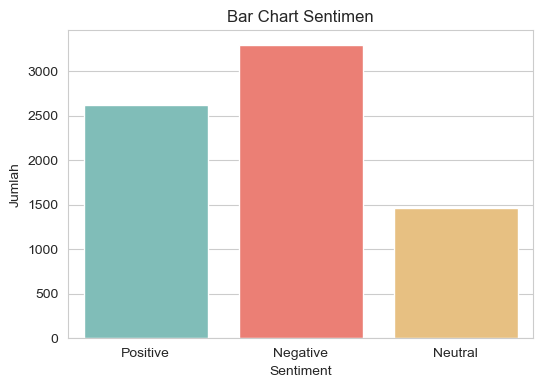

In [54]:
# sns.set_palette("bright")
# plt.figure(figsize=(6, 4))
# sns.countplot(x='sentiment', data=df)
# plt.title("Bar Chart Sentimen")
# plt.xlabel("Sentiment")
# plt.ylabel("Jumlah")
# plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

# Menggunakan warna manual
sns.countplot(x='sentiment', data=df, palette=["#76c7c0", "#ff6f61", "#f8c471"])

plt.title("Bar Chart Sentimen")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

In [55]:
data_positive = df[df["sentiment"]=='Positive']
data_negative = df[df["sentiment"]=='Negative']
data_neutral = df[df["sentiment"]=='Neutral']

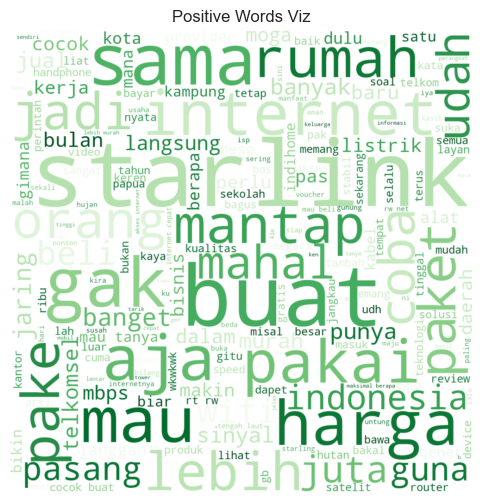

In [56]:
all_text_s1 = ' '.join(word for word in data_positive["comment"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Words Viz")
plt.margins(x=0, y=0)
plt.show()

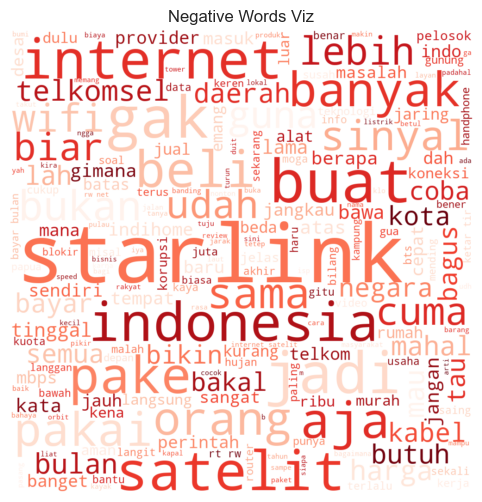

In [57]:
all_text_s0 = ' '.join(word for word in data_negative["comment"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Words Viz")
plt.margins(x=0, y=0)
plt.show()

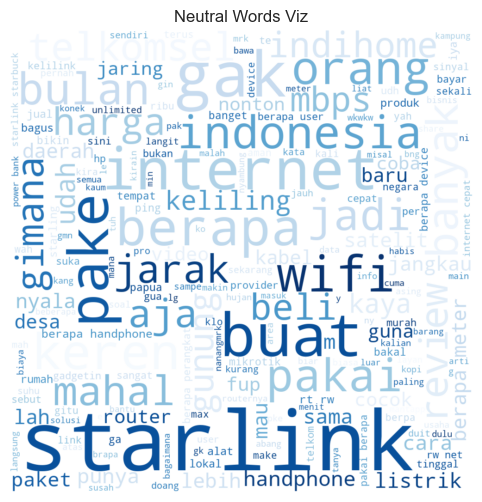

In [58]:
all_text_s2 = ' '.join(word for word in data_neutral["comment"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Words Viz")
plt.margins(x=0, y=0)
plt.show()

SPLITTING DATA

In [60]:
x = df.comment
y = df.sentiment

In [61]:
from sklearn.model_selection import train_test_split

# # Splitting 40:60
x_train_40, x_test_40, y_train_40, y_test_40 = train_test_split(x, y, test_size=0.4, random_state=42)

# # Splitting 30:70
x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(x, y, test_size=0.3, random_state=42)

# # Splitting 20:80 (seperti yang sudah ada)
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42)


ALGORYTHM

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
x = df.comment
y = df.sentiment

In [67]:
# Split data into different ratios
x_train_40, x_test_40, y_train_40, y_test_40 = train_test_split(
    x, y, test_size=0.4, random_state=42)
x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(
    x, y, test_size=0.3, random_state=42)
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [68]:
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TfidfVectorizer': TfidfVectorizer(),
    'HashingVectorizer': HashingVectorizer()
}

In [69]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', rf_model)
])

In [70]:
def train_and_evaluate_pipeline(model, x_train, x_test, y_train, y_test, split_ratio):
    """Train and evaluate the model pipeline with metrics and visualization."""
    # Train model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Print evaluation results
    print(f"\nEvaluasi Model (Random Forest) - Pembagian {split_ratio}")
    print("=" * 45)
    print(f"Akurasi: {metrics['accuracy']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Presisi: {metrics['precision']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

# Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, split_ratio)

In [161]:
def plot_confusion_matrix(y_true, y_pred, split_ratio):
    """Plot confusion matrix with consistent styling."""
    cm = confusion_matrix(y_true, y_pred)
    class_labels = ["Negative", "Neutral", "Positive"]
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels
    )
    plt.title(f'Confusion Matrix (Pembagian {split_ratio})')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.tight_layout()
    plt.show()

In [163]:
def predict_sentiment(input_text, model, preprocess_functions):
    """Predict sentiment for user input with preprocessing."""
    # Apply all preprocessing steps
    processed_text = input_text.lower()
    for func in preprocess_functions:
        processed_text = func(processed_text)
    
    # Predict sentiment
    return model.predict([processed_text])[0]


Evaluasi Model (Random Forest) - Pembagian 60:40
Akurasi: 0.7583
Recall: 0.7583
Presisi: 0.7608
F1-Score: 0.7590

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78      1312
     Neutral       0.67      0.74      0.70       583
    Positive       0.78      0.74      0.76      1059

    accuracy                           0.76      2954
   macro avg       0.74      0.75      0.75      2954
weighted avg       0.76      0.76      0.76      2954



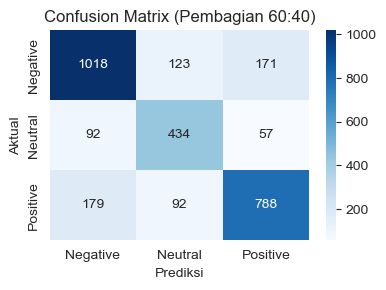


Evaluasi Model (Random Forest) - Pembagian 70:30
Akurasi: 0.7699
Recall: 0.7699
Presisi: 0.7728
F1-Score: 0.7708

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79       994
     Neutral       0.66      0.74      0.70       429
    Positive       0.79      0.78      0.79       793

    accuracy                           0.77      2216
   macro avg       0.75      0.76      0.76      2216
weighted avg       0.77      0.77      0.77      2216



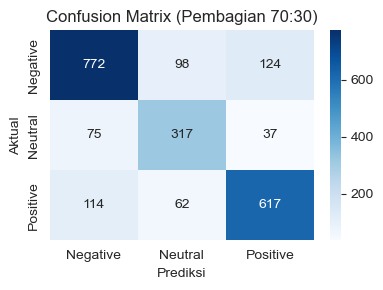


Evaluasi Model (Random Forest) - Pembagian 80:20
Akurasi: 0.7739
Recall: 0.7739
Presisi: 0.7751
F1-Score: 0.7742

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80       635
     Neutral       0.69      0.72      0.70       295
    Positive       0.81      0.76      0.78       547

    accuracy                           0.77      1477
   macro avg       0.76      0.76      0.76      1477
weighted avg       0.78      0.77      0.77      1477



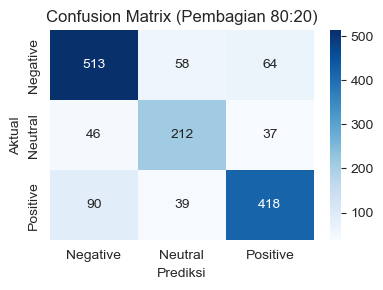

In [165]:
# Evaluate models on different splits
train_and_evaluate_pipeline(
    model_pipeline, x_train_40, x_test_40, y_train_40, y_test_40, "60:40"
)
train_and_evaluate_pipeline(
    model_pipeline, x_train_30, x_test_30, y_train_30, y_test_30, "70:30"
)
train_and_evaluate_pipeline(
    model_pipeline, x_train_20, x_test_20, y_train_20, y_test_20, "80:20"
)

# Prepare preprocessing functions (assuming these functions are defined elsewhere)
preprocess_functions = [
    clean_comment_text,
    normalisasi,
    lambda x: ' '.join(stopword_text(tokenize_text(x))),
    lambda x: ' '.join(stemming_text(tokenize_text(x)))
]


In [74]:
def predict_sentiment_with_proba(input_text, model, preprocess_functions):
    """Predict sentiment with probability scores for each class"""
    # Preprocess input
    processed_text = input_text.lower()
    for func in preprocess_functions:
        processed_text = func(processed_text)
    
    # Get probabilities and predicted class
    proba = model.predict_proba([processed_text])[0]  # Example: [0.1, 0.3, 0.6]
    predicted_class = model.predict([processed_text])[0]  # Example: "Positive"
    
    # Map classes to labels (sesuaikan dengan data Anda)
    class_labels = ["Negative", "Neutral", "Positive"]
    
    # Convert probabilities to percentages
    proba_percent = {label: f"{prob*100:.2f}%" 
                     for label, prob in zip(class_labels, proba)}
    
    return predicted_class, proba_percent

# Contoh penggunaan:
if __name__ == "__main__":
    # Latih model dengan data 20:80 (seperti sebelumnya)
    final_model = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
    ])
    final_model.fit(x_train_20, y_train_20)
    
    # Input dari user
    user_input = input("Masukkan komentar untuk analisis sentimen: ")
    
    # Prediksi
    predicted_sentiment, proba = predict_sentiment_with_proba(
        user_input, final_model, preprocess_functions
    )
    
    # Tampilkan hasil
    print("\n=== HASIL ANALISIS SENTIMEN ===")
    print(f"Komentar: '{user_input}'")
    print("\nProbabilitas Sentimen:")
    for label, percent in proba.items():
        print(f"- {label}: {percent}")
    print(f"\n Prediksi Akhir: {predicted_sentiment} ")

Masukkan komentar untuk analisis sentimen:  barangnya bagus



=== HASIL ANALISIS SENTIMEN ===
Komentar: 'barangnya bagus'

Probabilitas Sentimen:
- Negative: 74.50%
- Neutral: 22.50%
- Positive: 3.00%

 Prediksi Akhir: Negative 


In [75]:
print(final_model.named_steps['classifier'].classes_)

['Negative' 'Neutral' 'Positive']
